In [1]:
import os

import numpy as np
import tensorflow as tf

from tensorflow_vgg import vgg16
from tensorflow_vgg import utils
print('all imported' )

all imported


# Built vgg graph

In [2]:
# Run this cell if you don't have a vgg graph built
if 'vgg' in globals():
    print('"vgg" object already exists.  Will not create again.')
else:
    #create vgg
    with tf.Session() as sess:
        input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
        vgg = vgg16.Vgg16()
        #vgg.build(input_)
        with tf.name_scope("content_vgg"):
                vgg.build(input_)
        
#    with tf.Session() as sess:
#            vgg = vgg16.Vgg16()
#            input_test_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
#            with tf.name_scope("content_vgg"):
#                vgg.build(input_test_)

D:\Training\udacity\DeepLearningNanoDegree\Projects\dermatologist-ai-master\tensorflow_vgg\vgg16.npy
npy file loaded
build model started
build model finished: 0s


# ConvNet Codes for Training  images in our dataset and get codes for each of them

In [88]:
data_dir = './data/train/'
contents = os.listdir(data_dir)
classes = [each for each in contents if os.path.isdir(data_dir + each)]
print(classes)


['melanoma', 'nevus', 'seborrheic_keratosis']


In [4]:
# Set the batch size higher if you can fit in in your GPU memory
batch_size = 10
codes_list = []
labels = []
batch = []

codes = None



for each in classes:
        print("Starting {} images".format(each))
        class_path = data_dir + each
        files = os.listdir(class_path)
        for ii, file in enumerate(files, 1):
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
            img = utils.load_image(os.path.join(class_path, file))
            batch.append(img.reshape((1, 224, 224, 3)))
            labels.append(each)
            
            # Running the batch through the network to get the codes
            if ii % batch_size == 0 or ii == len(files):
                
                # Image batch to pass to VGG network
                images = np.concatenate(batch)
                
                # TODO: Get the values from the relu6 layer of the VGG network
                feed_dict = {input_: images}
                codes_batch = sess.run(vgg.relu6, feed_dict=feed_dict)

                
                # Here I'm building an array of the codes
                if codes is None:
                    codes = codes_batch
                else:
                    codes = np.concatenate((codes, codes_batch))
                
                # Reset to start building the next batch
                batch = []
                print('{} images processed'.format(ii))

Starting melanoma images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
80 images processed
90 images processed
100 images processed
110 images processed
120 images processed
130 images processed
140 images processed
150 images processed
160 images processed
170 images processed
180 images processed
190 images processed
200 images processed
210 images processed
220 images processed
230 images processed
240 images processed
250 images processed
260 images processed
270 images processed
280 images processed
290 images processed
300 images processed
310 images processed
320 images processed
330 images processed
340 images processed
350 images processed
360 images processed
370 images processed
374 images processed
Starting nevus images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
80 images processed
90 i

In [7]:
# Set the batch size higher if you can fit in in your GPU memory
#batch_size = 10
#codes_list = []
#labels = []
#batch = []

#codes = None

#with tf.Session() as sess:
    
    # TODO: Build the vgg network here
#    with tf.Session() as sess:
#        vgg = vgg16.Vgg16()
#        input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
#        with tf.name_scope("content_vgg"):
#            vgg.build(input_)

#    for each in classes:
#        print("Starting {} images".format(each))
#        class_path = data_dir + each
#        files = os.listdir(class_path)
#        for ii, file in enumerate(files, 1):
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
#            img = utils.load_image(os.path.join(class_path, file))
#            batch.append(img.reshape((1, 224, 224, 3)))
#            labels.append(each)
            
            # Running the batch through the network to get the codes
#            if ii % batch_size == 0 or ii == len(files):
                
                # Image batch to pass to VGG network
#                images = np.concatenate(batch)
                
                # TODO: Get the values from the relu6 layer of the VGG network
#                feed_dict = {input_: images}
#                codes_batch = sess.run(vgg.relu6, feed_dict=feed_dict)

                
                # Here I'm building an array of the codes
#                if codes is None:
#                    codes = codes_batch
#                else:
#                    codes = np.concatenate((codes, codes_batch))
                
                # Reset to start building the next batch
#                batch = []
#                print('{} images processed'.format(ii))

D:\Training\udacity\DeepLearningNanoDegree\Projects\dermatologist-ai-master\tensorflow_vgg\vgg16.npy
npy file loaded
build model started
build model finished: 0s
Starting melanoma images
10 images processed
20 images processed
30 images processed
40 images processed
50 images processed
60 images processed
70 images processed
80 images processed
90 images processed
100 images processed
110 images processed
120 images processed
130 images processed
140 images processed
150 images processed
160 images processed
170 images processed
180 images processed
190 images processed
200 images processed
210 images processed
220 images processed
230 images processed
240 images processed
250 images processed
260 images processed
270 images processed
280 images processed
290 images processed
300 images processed
310 images processed
320 images processed
330 images processed
340 images processed
350 images processed
360 images processed
370 images processed
374 images processed
Starting nevus images
10

In [5]:
# write codes to file
with open('codes_train', 'w') as f:
    codes.tofile(f)
    
# write labels to file
import csv
with open('labels_train', 'w') as f:
    writer = csv.writer(f, delimiter='\n')
    writer.writerow(labels)

# ConvNet Codes for Testing  images in our dataset and get codes for each of them

In [89]:
data_dir_test = './data/test/'
contents_test = os.listdir(data_dir_test)
classes_test = [each_test for each_test in contents_test if os.path.isdir(data_dir_test + each_test)]
print(classes_test)

['melanoma', 'nevus', 'seborrheic_keratosis']


In [9]:
# Set the batch size higher if you can fit in in your GPU memory
batch_size_test = 10
codes_list_test = []
labels_test = []
batch_test = []

codes_test = None


for each_test in classes_test:
        print("Starting {} images".format(each_test))
        class_path_test = data_dir_test + each_test
        files_test = os.listdir(class_path_test)
        for jj, file_test in enumerate(files_test, 1):
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
            img = utils.load_image(os.path.join(class_path_test, file_test))
            batch_test.append(img.reshape((1, 224, 224, 3)))
            labels_test.append(each_test)
            
            # Running the batch through the network to get the codes
            if jj % batch_size_test == 0 or jj == len(files_test):
                
                # Image batch to pass to VGG network
                images_test = np.concatenate(batch_test)
                
                # TODO: Get the values from the relu6 layer of the VGG network
                feed_dict_test = {input_: images_test}
                
                codes_batch_test = sess.run(vgg.relu6, feed_dict=feed_dict_test)

                
                # Here I'm building an array of the codes
                if codes_test is None:
                    codes_test = codes_batch_test
                else:
                    codes_test = np.concatenate((codes_test, codes_batch_test))
                
                # Reset to start building the next batch
                batch_test = []
                print('{} images processed for label = {}'.format(jj,each_test ))

Starting melanoma images
10 images processed for label = melanoma
20 images processed for label = melanoma
30 images processed for label = melanoma
40 images processed for label = melanoma
50 images processed for label = melanoma
60 images processed for label = melanoma
70 images processed for label = melanoma
80 images processed for label = melanoma
90 images processed for label = melanoma
100 images processed for label = melanoma
110 images processed for label = melanoma
117 images processed for label = melanoma
Starting nevus images
10 images processed for label = nevus
20 images processed for label = nevus
30 images processed for label = nevus
40 images processed for label = nevus
50 images processed for label = nevus
60 images processed for label = nevus
70 images processed for label = nevus
80 images processed for label = nevus
90 images processed for label = nevus
100 images processed for label = nevus
110 images processed for label = nevus
120 images processed for label = nevus

In [10]:
print("ValueError: GraphDef cannot be larger than 2GB.\n")
print("The above error is due to repeated opening of tf.Session and sess.run() \n")
print("Thus tf.Session is only once defined at the START")
# Set the batch size higher if you can fit in in your GPU memory
#batch_size_test = 10
#codes_list_test = []
#labels_test = []
#batch_test = []

#codes_test = None

#with tf.Session() as sess:
    
    # TODO: Build the vgg network here
#    if 'vgg' in globals():
#        print('"vgg" object already exists.  Will not create again.')
#    else:
#        with tf.Session() as sess:
#            vgg = vgg16.Vgg16()
#            input_test_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
#            with tf.name_scope("content_vgg"):
#                vgg.build(input_test_)

#    for each_test in classes_test:
#        print("Starting {} images".format(each_test))
#        class_path_test = data_dir_test + each_test
#        files_test = os.listdir(class_path_test)
#        for jj, file_test in enumerate(files_test, 1):
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
#            img = utils.load_image(os.path.join(class_path_test, file_test))
#            batch_test.append(img.reshape((1, 224, 224, 3)))
#            labels_test.append(each_test)
            
            # Running the batch through the network to get the codes
#            if jj % batch_size_test == 0 or jj == len(files_test):
                
                # Image batch to pass to VGG network
#                images_test = np.concatenate(batch_test)
                
                # TODO: Get the values from the relu6 layer of the VGG network
#                feed_dict_test = {input_test_: images_test}
                
#                codes_batch_test = sess.run(vgg.relu6, feed_dict=feed_dict_test)

                
                # Here I'm building an array of the codes
#                if codes_test is None:
#                    codes_test = codes_batch_test
#                else:
#                    codes_test = np.concatenate((codes_test, codes_batch_test))
                
                # Reset to start building the next batch
#                batch_test = []
#                print('{} images processed for label = {}'.format(jj,each_test ))

ValueError: GraphDef cannot be larger than 2GB.

The above error is due to repeated opening of tf.Session and sess.run() 

Thus tf.Session is only once defined at the START


In [11]:
# write codes to file
with open('codes_test', 'w') as f:
    codes_test.tofile(f)
    
# write labels to file
import csv
with open('labels_test', 'w') as f:
    writer = csv.writer(f, delimiter='\n')
    writer.writerow(labels_test)

# ConvNet Codes for Testing images in our dataset and get codes for each of them

In [90]:
data_dir_valid = './data/valid/'
contents_valid = os.listdir(data_dir_valid)
classes_valid = [each_valid for each_valid in contents_valid if os.path.isdir(data_dir_valid + each_valid)]
print(classes_valid)

['melanoma', 'nevus', 'seborrheic_keratosis']


In [15]:
# Set the batch size higher if you can fit in in your GPU memory
batch_size_valid = 10
codes_list_valid = []
labels_valid = []
batch_valid = []

codes_valid = None



for each_valid in classes_valid:
        print("Starting {} images".format(each_valid))
        class_path_valid = data_dir_valid + each_valid
        files_valid = os.listdir(class_path_valid)
        for kk, file_valid in enumerate(files_valid, 1):
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
            img_valid = utils.load_image(os.path.join(class_path_valid, file_valid))
            batch_valid.append(img_valid.reshape((1, 224, 224, 3)))
            labels_valid.append(each_valid)
            
            # Running the batch through the network to get the codes
            if kk % batch_size_valid == 0 or kk == len(files_valid):
                
                # Image batch to pass to VGG network
                images_valid = np.concatenate(batch_valid)
                
                # TODO: Get the values from the relu6 layer of the VGG network
                feed_dict_valid = {input_: images_valid}
                codes_batch_valid = sess.run(vgg.relu6, feed_dict=feed_dict_valid)

                
                # Here I'm building an array of the codes
                if codes_valid is None:
                    codes_valid = codes_batch_valid
                else:
                    codes_valid = np.concatenate((codes_valid, codes_batch_valid))
                
                # Reset to start building the next batch
                batch_valid = []
                print('{} images processed for label = {}'.format(kk,each_valid ))

Starting melanoma images
10 images processed for label = melanoma
20 images processed for label = melanoma
30 images processed for label = melanoma
Starting nevus images
10 images processed for label = nevus
20 images processed for label = nevus
30 images processed for label = nevus
40 images processed for label = nevus
50 images processed for label = nevus
60 images processed for label = nevus
70 images processed for label = nevus
78 images processed for label = nevus
Starting seborrheic_keratosis images
10 images processed for label = seborrheic_keratosis
20 images processed for label = seborrheic_keratosis
30 images processed for label = seborrheic_keratosis
40 images processed for label = seborrheic_keratosis
42 images processed for label = seborrheic_keratosis


In [12]:
print("ValueError: GraphDef cannot be larger than 2GB.\n")
print("The above error is due to repeated opening of tf.Session and sess.run() \n")
print("Thus tf.Session is only once defined at the START")
# Set the batch size higher if you can fit in in your GPU memory
#batch_size_valid = 10
#codes_list_valid = []
#labels_valid = []
#batch_valid = []

#codes_valid = None

#with tf.Session() as sess:
    
    # TODO: Build the vgg network here
#    with tf.Session() as sess:
#        vgg = vgg16.Vgg16()
#        input_valid_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
#        with tf.name_scope("content_vgg"):
#            vgg.build(input_valid_)

#    for each_valid in classes_valid:
#        print("Starting {} images".format(each_valid))
#        class_path_valid = data_dir_valid + each_valid
#        files_valid = os.listdir(class_path_valid)
#        for kk, file_valid in enumerate(files_valid, 1):
            # Add images to the current batch
            # utils.load_image crops the input images for us, from the center
#            img_valid = utils.load_image(os.path.join(class_path_valid, file_valid))
#            batch_valid.append(img_valid.reshape((1, 224, 224, 3)))
#            labels_valid.append(each_valid)
            
            # Running the batch through the network to get the codes
#            if kk % batch_size_valid == 0 or kk == len(files_valid):
                
                # Image batch to pass to VGG network
#                images_valid = np.concatenate(batch_valid)
                
                # TODO: Get the values from the relu6 layer of the VGG network
#                feed_dict_valid = {input_valid_: images_valid}
#                codes_batch_valid = sess.run(vgg.relu6, feed_dict=feed_dict_valid)

                
                # Here I'm building an array of the codes
#                if codes_valid is None:
#                    codes_valid = codes_batch_valid
#                else:
#                    codes_valid = np.concatenate((codes_valid, codes_batch_valid))
                
                # Reset to start building the next batch
#                batch_valid = []
#                print('{} images processed for label = {}'.format(kk,each_valid ))

ValueError: GraphDef cannot be larger than 2GB.

The above error is due to repeated opening of tf.Session and sess.run() 

Thus tf.Session is only once defined at the START


In [16]:
# write codes to file
with open('codes_valid', 'w') as f:
    codes_valid.tofile(f)
    
# write labels to file
import csv
with open('labels_valid', 'w') as f:
    writer = csv.writer(f, delimiter='\n')
    writer.writerow(labels_valid)

In [20]:
# read codes and labels from file
import csv
with open('labels_train') as f:
    reader_train = csv.reader(f, delimiter='\n')
    labels_train = np.array([each_train for each_train in reader_train if len(each_train) > 0]).squeeze()
with open('codes_train') as f:
    codes_train = np.fromfile(f, dtype=np.float32)
    codes_train = codes_train.reshape((len(labels_train), -1))
    

with open('labels_test') as f:
    reader_test = csv.reader(f, delimiter='\n')
    labels_test = np.array([each_test for each_test in reader_test if len(each_test) > 0]).squeeze()
with open('codes_test') as f:
    codes_test = np.fromfile(f, dtype=np.float32)
    codes_test = codes_test.reshape((len(labels_test), -1))
    
    

with open('labels_valid') as f:
    reader_valid = csv.reader(f, delimiter='\n')
    labels_valid = np.array([each_valid for each_valid in reader_valid if len(each_valid) > 0]).squeeze()
with open('codes_valid') as f:
    codes_valid = np.fromfile(f, dtype=np.float32)
    codes_valid = codes_valid.reshape((len(labels_valid), -1))

In [21]:
print("Train ",codes_train.shape,labels_train.shape )
print("Test ",codes_test.shape,labels_test.shape )
print("Valid ",codes_valid.shape,labels_valid.shape )

Train  (2000, 4096) (2000,)
Test  (600, 4096) (600,)
Valid  (150, 4096) (150,)


In [30]:
print(codes_valid[1])
print(labels_valid[1])

print(codes_valid[146])
print(labels_valid[146])

[ 0.          0.          0.         ...,  0.45912069  0.          0.        ]
melanoma
[ 0.          0.          0.         ...,  2.32264352  0.20739438  0.        ]
seborrheic_keratosis


#  one-hot encoded labels array here

In [25]:
from sklearn.preprocessing import LabelBinarizer
def one_hot_encoded_labels(label_s):
    lb = LabelBinarizer()
    lb.fit(label_s)
    labels_vecs = lb.transform(label_s)
    return labels_vecs

In [26]:
labels_train_en = one_hot_encoded_labels(labels_train)
labels_test_en = one_hot_encoded_labels(labels_test)
labels_valid_en = one_hot_encoded_labels(labels_valid)

In [27]:
print("Train ",codes_train.shape,labels_train_en.shape )
print("Test ",codes_test.shape,labels_test_en.shape )
print("Valid ",codes_valid.shape,labels_valid_en.shape )

Train  (2000, 4096) (2000, 3)
Test  (600, 4096) (600, 3)
Valid  (150, 4096) (150, 3)


In [29]:
print(codes_valid[1])
print(labels_valid_en[1])

print(codes_valid[146])
print(labels_valid_en[146])

[ 0.          0.          0.         ...,  0.45912069  0.          0.        ]
[1 0 0]
[ 0.          0.          0.         ...,  2.32264352  0.20739438  0.        ]
[0 0 1]


In [36]:
print("Input =", codes_train.shape[1]+codes_test.shape[1]+codes_valid.shape[1])
print("Labels =", labels_train_en.shape[1]+labels_test_en.shape[1]+labels_valid_en.shape[1])

all_codes = codes_train.shape[1]+codes_test.shape[1]+codes_valid.shape[1]
all_labels = labels_train_en.shape[1]+labels_test_en.shape[1]+labels_valid_en.shape[1]

Input = 12288
Labels = 9


# Classifier layers
Once you have the convolutional codes, you just need to build a classfier from some fully connected layers. You use the codes as the inputs and the image labels as targets. Otherwise the classifier is a typical neural network.

In [68]:
inputs_ = tf.placeholder(tf.float32, shape=[None, codes_train.shape[1]])
labels_ = tf.placeholder(tf.int64, shape=[None, labels_train_en.shape[1]])

# TODO: Classifier layers and operations
fc = tf.contrib.layers.fully_connected(inputs_, 1024)

# output layer logits
logits = tf.contrib.layers.fully_connected(fc, labels_train_en.shape[1], activation_fn=None)

# cross entropy loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=labels_, logits=logits)
# cross entropy loss
cost = tf.reduce_mean(cross_entropy)


# training optimizer
optimizer = tf.train.AdamOptimizer().minimize(cost)
# Operations for validation/test accuracy
predicted = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(predicted, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


predicted = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(predicted, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [44]:
print(accuracy, predicted, correct_pred)

Tensor("Mean_5:0", shape=(), dtype=float32) Tensor("Softmax_3:0", shape=(?, 3), dtype=float32) Tensor("Equal_3:0", shape=(?,), dtype=bool)


In [52]:
print(accuracy, predicted, correct_pred)

Tensor("Mean_11:0", shape=(), dtype=float32) Tensor("Softmax_7:0", shape=(?, 9), dtype=float32) Tensor("Equal_7:0", shape=(?,), dtype=bool)


In [55]:
print(accuracy, predicted, correct_pred)

Tensor("Mean_14:0", shape=(), dtype=float32) Tensor("Softmax_9:0", shape=(?, 9), dtype=float32) Tensor("Equal_9:0", shape=(?,), dtype=bool)


# Batches!
Here is just a simple way to do batches. This will include all the data without throwing out some data at the end to make sure we have full batches. 

In [45]:
def get_batches(x, y, n_batches=10):
    """ Return a generator that yields batches from arrays x and y. """
    batch_size = len(x)//n_batches
    
    for ii in range(0, n_batches*batch_size, batch_size):
        # If we're not on the last batch, grab data with size batch_size
        if ii != (n_batches-1)*batch_size:
            X, Y = x[ii: ii+batch_size], y[ii: ii+batch_size] 
        # On the last batch, grab the rest of the data
        else:
            X, Y = x[ii:], y[ii:]
        # I love generators
        yield X, Y

In [69]:
epochs = 150
iteration = 0
saver = tf.train.Saver()
with tf.Session() as sess:
    
    
    
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for x, y in get_batches(codes_train,labels_train_en):
            feed = {inputs_: x,
                    labels_: y}
            loss, _ = sess.run([cost, optimizer], feed_dict=feed)
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Iteration: {}".format(iteration),
                  "Training loss: {:.5f}".format(loss))
            iteration += 1
            
            if iteration % 5 == 0:
                feed = {inputs_: codes_valid,
                        labels_: labels_valid_en}
                val_acc = sess.run(accuracy, feed_dict=feed)
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Validation Acc: {:.4f}".format(val_acc))
    saver.save(sess, "./checkpoints/flowers.ckpt")

Epoch: 1/150 Iteration: 0 Training loss: 0.58530
Epoch: 1/150 Iteration: 1 Training loss: 13.84747
Epoch: 1/150 Iteration: 2 Training loss: 91.51723
Epoch: 1/150 Iteration: 3 Training loss: 15.84381
Epoch: 1/150 Iteration: 4 Training loss: 0.00000
Epoch: 0/150 Iteration: 5 Validation Acc: 0.5200
Epoch: 1/150 Iteration: 5 Training loss: 0.00000
Epoch: 1/150 Iteration: 6 Training loss: 0.00000
Epoch: 1/150 Iteration: 7 Training loss: 0.00000
Epoch: 1/150 Iteration: 8 Training loss: 73.05898
Epoch: 1/150 Iteration: 9 Training loss: 293.44257
Epoch: 0/150 Iteration: 10 Validation Acc: 0.5200
Epoch: 2/150 Iteration: 10 Training loss: 129.43965
Epoch: 2/150 Iteration: 11 Training loss: 90.58964
Epoch: 2/150 Iteration: 12 Training loss: 0.00000
Epoch: 2/150 Iteration: 13 Training loss: 0.00000
Epoch: 2/150 Iteration: 14 Training loss: 0.00000
Epoch: 1/150 Iteration: 15 Validation Acc: 0.5200
Epoch: 2/150 Iteration: 15 Training loss: 0.00000
Epoch: 2/150 Iteration: 16 Training loss: 0.00000
Ep

Epoch: 15/150 Iteration: 146 Training loss: 0.48979
Epoch: 15/150 Iteration: 147 Training loss: 0.46158
Epoch: 15/150 Iteration: 148 Training loss: 0.73732
Epoch: 15/150 Iteration: 149 Training loss: 1.78433
Epoch: 14/150 Iteration: 150 Validation Acc: 0.5200
Epoch: 16/150 Iteration: 150 Training loss: 1.70147
Epoch: 16/150 Iteration: 151 Training loss: 1.28458
Epoch: 16/150 Iteration: 152 Training loss: 0.30816
Epoch: 16/150 Iteration: 153 Training loss: 0.25328
Epoch: 16/150 Iteration: 154 Training loss: 0.33661
Epoch: 15/150 Iteration: 155 Validation Acc: 0.5200
Epoch: 16/150 Iteration: 155 Training loss: 0.39920
Epoch: 16/150 Iteration: 156 Training loss: 0.47969
Epoch: 16/150 Iteration: 157 Training loss: 0.45259
Epoch: 16/150 Iteration: 158 Training loss: 0.73379
Epoch: 16/150 Iteration: 159 Training loss: 1.78511
Epoch: 15/150 Iteration: 160 Validation Acc: 0.5200
Epoch: 17/150 Iteration: 160 Training loss: 1.70586
Epoch: 17/150 Iteration: 161 Training loss: 1.28634
Epoch: 17/15

Epoch: 31/150 Iteration: 302 Training loss: 0.28462
Epoch: 31/150 Iteration: 303 Training loss: 0.17170
Epoch: 31/150 Iteration: 304 Training loss: 0.25063
Epoch: 30/150 Iteration: 305 Validation Acc: 0.5200
Epoch: 31/150 Iteration: 305 Training loss: 0.33461
Epoch: 31/150 Iteration: 306 Training loss: 0.44867
Epoch: 31/150 Iteration: 307 Training loss: 0.43662
Epoch: 31/150 Iteration: 308 Training loss: 0.69308
Epoch: 31/150 Iteration: 309 Training loss: 1.60277
Epoch: 30/150 Iteration: 310 Validation Acc: 0.5200
Epoch: 32/150 Iteration: 310 Training loss: 1.59368
Epoch: 32/150 Iteration: 311 Training loss: 1.22727
Epoch: 32/150 Iteration: 312 Training loss: 0.28305
Epoch: 32/150 Iteration: 313 Training loss: 0.16681
Epoch: 32/150 Iteration: 314 Training loss: 0.24126
Epoch: 31/150 Iteration: 315 Validation Acc: 0.5200
Epoch: 32/150 Iteration: 315 Training loss: 0.31971
Epoch: 32/150 Iteration: 316 Training loss: 0.42896
Epoch: 32/150 Iteration: 317 Training loss: 0.41439
Epoch: 32/15

Epoch: 44/150 Iteration: 437 Training loss: 0.41911
Epoch: 44/150 Iteration: 438 Training loss: 0.65401
Epoch: 44/150 Iteration: 439 Training loss: 1.48686
Epoch: 43/150 Iteration: 440 Validation Acc: 0.5200
Epoch: 45/150 Iteration: 440 Training loss: 1.43190
Epoch: 45/150 Iteration: 441 Training loss: 1.17726
Epoch: 45/150 Iteration: 442 Training loss: 0.25733
Epoch: 45/150 Iteration: 443 Training loss: 0.15360
Epoch: 45/150 Iteration: 444 Training loss: 0.22301
Epoch: 44/150 Iteration: 445 Validation Acc: 0.5200
Epoch: 45/150 Iteration: 445 Training loss: 0.29337
Epoch: 45/150 Iteration: 446 Training loss: 0.39183
Epoch: 45/150 Iteration: 447 Training loss: 0.37581
Epoch: 45/150 Iteration: 448 Training loss: 0.64393
Epoch: 45/150 Iteration: 449 Training loss: 1.61874
Epoch: 44/150 Iteration: 450 Validation Acc: 0.5200
Epoch: 46/150 Iteration: 450 Training loss: 1.44152
Epoch: 46/150 Iteration: 451 Training loss: 1.16377
Epoch: 46/150 Iteration: 452 Training loss: 0.24952
Epoch: 46/15

Epoch: 60/150 Iteration: 594 Training loss: 0.21670
Epoch: 59/150 Iteration: 595 Validation Acc: 0.6533
Epoch: 60/150 Iteration: 595 Training loss: 0.28859
Epoch: 60/150 Iteration: 596 Training loss: 0.38353
Epoch: 60/150 Iteration: 597 Training loss: 0.37282
Epoch: 60/150 Iteration: 598 Training loss: 0.60568
Epoch: 60/150 Iteration: 599 Training loss: 1.34336
Epoch: 59/150 Iteration: 600 Validation Acc: 0.5867
Epoch: 61/150 Iteration: 600 Training loss: 1.30239
Epoch: 61/150 Iteration: 601 Training loss: 1.13927
Epoch: 61/150 Iteration: 602 Training loss: 0.22403
Epoch: 61/150 Iteration: 603 Training loss: 0.13326
Epoch: 61/150 Iteration: 604 Training loss: 0.20161
Epoch: 60/150 Iteration: 605 Validation Acc: 0.6333
Epoch: 61/150 Iteration: 605 Training loss: 0.26579
Epoch: 61/150 Iteration: 606 Training loss: 0.33652
Epoch: 61/150 Iteration: 607 Training loss: 0.32422
Epoch: 61/150 Iteration: 608 Training loss: 0.59602
Epoch: 61/150 Iteration: 609 Training loss: 1.47702
Epoch: 60/15

Epoch: 76/150 Iteration: 751 Training loss: 1.00727
Epoch: 76/150 Iteration: 752 Training loss: 0.22143
Epoch: 76/150 Iteration: 753 Training loss: 0.13064
Epoch: 76/150 Iteration: 754 Training loss: 0.20307
Epoch: 75/150 Iteration: 755 Validation Acc: 0.6733
Epoch: 76/150 Iteration: 755 Training loss: 0.25484
Epoch: 76/150 Iteration: 756 Training loss: 0.31164
Epoch: 76/150 Iteration: 757 Training loss: 0.29526
Epoch: 76/150 Iteration: 758 Training loss: 0.56391
Epoch: 76/150 Iteration: 759 Training loss: 1.37942
Epoch: 75/150 Iteration: 760 Validation Acc: 0.6067
Epoch: 77/150 Iteration: 760 Training loss: 1.14355
Epoch: 77/150 Iteration: 761 Training loss: 1.02318
Epoch: 77/150 Iteration: 762 Training loss: 0.20671
Epoch: 77/150 Iteration: 763 Training loss: 0.12630
Epoch: 77/150 Iteration: 764 Training loss: 0.20204
Epoch: 76/150 Iteration: 765 Validation Acc: 0.6933
Epoch: 77/150 Iteration: 765 Training loss: 0.25834
Epoch: 77/150 Iteration: 766 Training loss: 0.32608
Epoch: 77/15

Epoch: 91/150 Iteration: 903 Training loss: 0.12172
Epoch: 91/150 Iteration: 904 Training loss: 0.20179
Epoch: 90/150 Iteration: 905 Validation Acc: 0.6667
Epoch: 91/150 Iteration: 905 Training loss: 0.24915
Epoch: 91/150 Iteration: 906 Training loss: 0.28050
Epoch: 91/150 Iteration: 907 Training loss: 0.26235
Epoch: 91/150 Iteration: 908 Training loss: 0.60973
Epoch: 91/150 Iteration: 909 Training loss: 1.49759
Epoch: 90/150 Iteration: 910 Validation Acc: 0.6400
Epoch: 92/150 Iteration: 910 Training loss: 0.94897
Epoch: 92/150 Iteration: 911 Training loss: 0.94811
Epoch: 92/150 Iteration: 912 Training loss: 0.19035
Epoch: 92/150 Iteration: 913 Training loss: 0.11659
Epoch: 92/150 Iteration: 914 Training loss: 0.18983
Epoch: 91/150 Iteration: 915 Validation Acc: 0.7000
Epoch: 92/150 Iteration: 915 Training loss: 0.23660
Epoch: 92/150 Iteration: 916 Training loss: 0.34063
Epoch: 92/150 Iteration: 917 Training loss: 0.32667
Epoch: 92/150 Iteration: 918 Training loss: 0.54417
Epoch: 92/15

Epoch: 104/150 Iteration: 1036 Training loss: 0.26845
Epoch: 104/150 Iteration: 1037 Training loss: 0.25457
Epoch: 104/150 Iteration: 1038 Training loss: 0.41312
Epoch: 104/150 Iteration: 1039 Training loss: 0.85519
Epoch: 103/150 Iteration: 1040 Validation Acc: 0.6467
Epoch: 105/150 Iteration: 1040 Training loss: 1.10048
Epoch: 105/150 Iteration: 1041 Training loss: 1.10833
Epoch: 105/150 Iteration: 1042 Training loss: 0.15418
Epoch: 105/150 Iteration: 1043 Training loss: 0.11189
Epoch: 105/150 Iteration: 1044 Training loss: 0.19108
Epoch: 104/150 Iteration: 1045 Validation Acc: 0.7467
Epoch: 105/150 Iteration: 1045 Training loss: 0.24437
Epoch: 105/150 Iteration: 1046 Training loss: 0.34944
Epoch: 105/150 Iteration: 1047 Training loss: 0.34363
Epoch: 105/150 Iteration: 1048 Training loss: 0.43773
Epoch: 105/150 Iteration: 1049 Training loss: 0.69713
Epoch: 104/150 Iteration: 1050 Validation Acc: 0.7200
Epoch: 106/150 Iteration: 1050 Training loss: 0.77032
Epoch: 106/150 Iteration: 10

Epoch: 117/150 Iteration: 1165 Training loss: 0.22038
Epoch: 117/150 Iteration: 1166 Training loss: 0.25310
Epoch: 117/150 Iteration: 1167 Training loss: 0.23830
Epoch: 117/150 Iteration: 1168 Training loss: 0.48654
Epoch: 117/150 Iteration: 1169 Training loss: 0.96592
Epoch: 116/150 Iteration: 1170 Validation Acc: 0.6933
Epoch: 118/150 Iteration: 1170 Training loss: 0.67535
Epoch: 118/150 Iteration: 1171 Training loss: 0.76738
Epoch: 118/150 Iteration: 1172 Training loss: 0.14975
Epoch: 118/150 Iteration: 1173 Training loss: 0.09953
Epoch: 118/150 Iteration: 1174 Training loss: 0.15640
Epoch: 117/150 Iteration: 1175 Validation Acc: 0.7200
Epoch: 118/150 Iteration: 1175 Training loss: 0.19523
Epoch: 118/150 Iteration: 1176 Training loss: 0.29257
Epoch: 118/150 Iteration: 1177 Training loss: 0.29260
Epoch: 118/150 Iteration: 1178 Training loss: 0.36885
Epoch: 118/150 Iteration: 1179 Training loss: 0.61934
Epoch: 117/150 Iteration: 1180 Validation Acc: 0.6933
Epoch: 119/150 Iteration: 11

Epoch: 130/150 Iteration: 1293 Training loss: 0.09838
Epoch: 130/150 Iteration: 1294 Training loss: 0.13258
Epoch: 129/150 Iteration: 1295 Validation Acc: 0.7067
Epoch: 130/150 Iteration: 1295 Training loss: 0.15601
Epoch: 130/150 Iteration: 1296 Training loss: 0.20234
Epoch: 130/150 Iteration: 1297 Training loss: 0.18807
Epoch: 130/150 Iteration: 1298 Training loss: 0.29682
Epoch: 130/150 Iteration: 1299 Training loss: 0.55511
Epoch: 129/150 Iteration: 1300 Validation Acc: 0.6933
Epoch: 131/150 Iteration: 1300 Training loss: 0.83876
Epoch: 131/150 Iteration: 1301 Training loss: 0.85325
Epoch: 131/150 Iteration: 1302 Training loss: 0.10058
Epoch: 131/150 Iteration: 1303 Training loss: 0.09467
Epoch: 131/150 Iteration: 1304 Training loss: 0.16092
Epoch: 130/150 Iteration: 1305 Validation Acc: 0.7000
Epoch: 131/150 Iteration: 1305 Training loss: 0.21231
Epoch: 131/150 Iteration: 1306 Training loss: 0.28186
Epoch: 131/150 Iteration: 1307 Training loss: 0.28896
Epoch: 131/150 Iteration: 13

Epoch: 143/150 Iteration: 1426 Training loss: 0.19819
Epoch: 143/150 Iteration: 1427 Training loss: 0.20043
Epoch: 143/150 Iteration: 1428 Training loss: 0.24586
Epoch: 143/150 Iteration: 1429 Training loss: 0.33793
Epoch: 142/150 Iteration: 1430 Validation Acc: 0.6733
Epoch: 144/150 Iteration: 1430 Training loss: 0.69602
Epoch: 144/150 Iteration: 1431 Training loss: 0.76063
Epoch: 144/150 Iteration: 1432 Training loss: 0.09540
Epoch: 144/150 Iteration: 1433 Training loss: 0.09753
Epoch: 144/150 Iteration: 1434 Training loss: 0.15996
Epoch: 143/150 Iteration: 1435 Validation Acc: 0.6867
Epoch: 144/150 Iteration: 1435 Training loss: 0.20755
Epoch: 144/150 Iteration: 1436 Training loss: 0.22908
Epoch: 144/150 Iteration: 1437 Training loss: 0.22384
Epoch: 144/150 Iteration: 1438 Training loss: 0.43880
Epoch: 144/150 Iteration: 1439 Training loss: 0.69580
Epoch: 143/150 Iteration: 1440 Validation Acc: 0.7067
Epoch: 145/150 Iteration: 1440 Training loss: 0.47179
Epoch: 145/150 Iteration: 14

In [70]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: codes_test,
            labels_: labels_test_en}
    test_acc = sess.run(accuracy, feed_dict=feed)
    print("Test accuracy: {:.4f}".format(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints\flowers.ckpt
Test accuracy: 0.6700


In [71]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.ndimage import imread

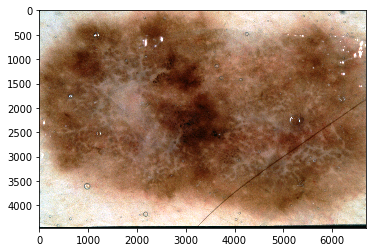

In [91]:
#test_img_path = './data/test/melanoma/ISIC_0013414.jpg'
test_img_path = './data/test/melanoma/ISIC_0014963.jpg'
#test_img_path = './data/test/melanoma/ISIC_0014790.jpg'
test_img = plt.imread(test_img_path)
plt.imshow(test_img)

In [92]:
with tf.Session() as sess:
    img = utils.load_image(test_img_path)
    img = img.reshape((1, 224, 224, 3))

    feed_dict = {input_: img}
    code = sess.run(vgg.relu6, feed_dict=feed_dict)
        
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: code}
    prediction = sess.run(predicted, feed_dict=feed).squeeze()

INFO:tensorflow:Restoring parameters from checkpoints\flowers.ckpt


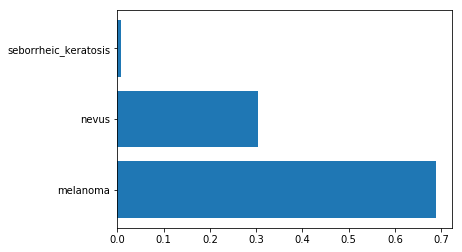

In [93]:

lb = LabelBinarizer()
lb.fit(labels_train)
labels_vecs = lb.transform(labels_test)
    
plt.barh(np.arange(3), prediction)
_ = plt.yticks(np.arange(3), lb.classes_)